In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse


In [3]:
data_surface = pd.read_csv("../BKK/train/bkk_temp_surface.csv")
data_surface['date_time']=pd.to_datetime(data_surface['date_time'])
data_surface.head()

,date_time,temp
0,2017-07-01 01:00:00,27.9
1,2017-07-01 04:00:00,27.4
2,2017-07-01 07:00:00,28.0
3,2017-07-01 10:00:00,31.1
4,2017-07-01 13:00:00,33.3


In [4]:
data_wind = pd.read_csv("../BKK/train/bkk_weather_wind.csv")
data_wind['date_time']=pd.to_datetime(data_wind['date_time'])
data_wind.head()

,date_time,wind speed,wind dir
0,2017-07-01 01:00:00,16,260
1,2017-07-01 04:00:00,16,255
2,2017-07-01 07:00:00,17,235
3,2017-07-01 10:00:00,18,240
4,2017-07-01 13:00:00,18,255


In [5]:
data = pd.merge(data_surface,data_wind,on="date_time")
data.head()

,date_time,temp,wind speed,wind dir
0,2017-07-01 01:00:00,27.9,16,260
1,2017-07-01 04:00:00,27.4,16,255
2,2017-07-01 07:00:00,28.0,17,235
3,2017-07-01 10:00:00,31.1,18,240
4,2017-07-01 13:00:00,33.3,18,255


In [6]:
data_pm=pd.read_csv("../BKK/train/bkk_train.csv")
data_pm.columns=['date_time','PM2-5']
data_pm['date_time']=pd.to_datetime(data_pm['date_time'])
data_pm.head()

,date_time,PM2-5
0,2017-07-01 00:00:00,14.0
1,2017-07-01 01:00:00,10.0
2,2017-07-01 02:00:00,17.0
3,2017-07-01 03:00:00,20.0
4,2017-07-01 04:00:00,15.0


In [7]:
data = pd.merge(data,data_pm,on='date_time')
data.head()

,date_time,temp,wind speed,wind dir,PM2-5
0,2017-07-01 01:00:00,27.9,16,260,10.0
1,2017-07-01 04:00:00,27.4,16,255,15.0
2,2017-07-01 07:00:00,28.0,17,235,23.0
3,2017-07-01 10:00:00,31.1,18,240,22.0
4,2017-07-01 13:00:00,33.3,18,255,14.0


In [8]:
data.set_index(data['date_time'],inplace=True)
data.drop(columns=['date_time'],inplace=True)

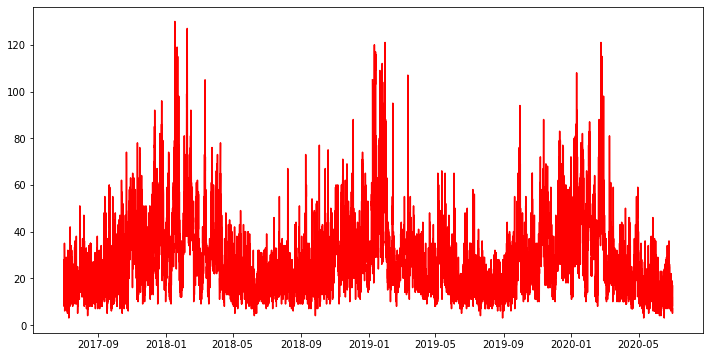

In [5]:
plt.figure(figsize=(12,6))
plt.plot(data['PM2-5'],'r')

In [6]:
data.head()

,PM2-5
date_time,
2017-07-01 00:00:00,14.0
2017-07-01 01:00:00,10.0
2017-07-01 02:00:00,17.0
2017-07-01 03:00:00,20.0
2017-07-01 04:00:00,15.0


In [7]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [9]:
data.dropna(inplace=True)

In [72]:
data.head()

,PM2-5
date_time,
2017-07-01 00:00:00,14.0
2017-07-01 01:00:00,10.0
2017-07-01 02:00:00,17.0
2017-07-01 03:00:00,20.0
2017-07-01 04:00:00,15.0


In [9]:
check_stationarity(data['PM2-5'])

The series is stationary


<Figure size 864x432 with 0 Axes>

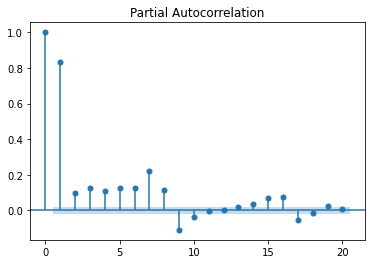

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,6))
plot_pacf(data['PM2-5'], lags =20)
plt.show()

In [ ]:
import pmdarima as pm
stepwise_model = pm.auto_arima(train['PM2-5'],start_p=1, d=0, start_q=1,
                            max_p=5, max_q=5,
                            m=12,
                            seasonal=True, stationary=False,
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=True).save()


In [ ]:
stepwise_model.fit(data['PM2-5'])

In [10]:
test = pd.read_csv('BKK_scape.csv')
test = test.iloc[:,1:]
test.head()

,date,PM2.5,date_utc,url_date,temp,wind,dir
0,2020-07-01 00:00:00,9.0,2020-06-30 17:00:00,2020/06/30/1700Z,29.4,35,270
1,2020-07-01 01:00:00,8.0,2020-06-30 18:00:00,2020/06/30/1800Z,29.4,42,260
2,2020-07-01 02:00:00,12.0,2020-06-30 19:00:00,2020/06/30/1900Z,28.5,42,260
3,2020-07-01 03:00:00,9.0,2020-06-30 20:00:00,2020/06/30/2000Z,28.5,42,260
4,2020-07-01 04:00:00,8.0,2020-06-30 21:00:00,2020/06/30/2100Z,28.3,55,270


In [11]:
test = test[['date','temp','wind','dir','PM2.5']]
test.head()

,date,temp,wind,dir,PM2.5
0,2020-07-01 00:00:00,29.4,35,270,9.0
1,2020-07-01 01:00:00,29.4,42,260,8.0
2,2020-07-01 02:00:00,28.5,42,260,12.0
3,2020-07-01 03:00:00,28.5,42,260,9.0
4,2020-07-01 04:00:00,28.3,55,270,8.0


In [12]:
test.columns = ['date_time','temp','wind speed','wind dir','PM2-5']
test['date_time']=pd.to_datetime(test['date_time'])
test.set_index('date_time',inplace=True)
test.head()

,temp,wind speed,wind dir,PM2-5
date_time,,,,
2020-07-01 00:00:00,29.4,35,270,9.0
2020-07-01 01:00:00,29.4,42,260,8.0
2020-07-01 02:00:00,28.5,42,260,12.0
2020-07-01 03:00:00,28.5,42,260,9.0
2020-07-01 04:00:00,28.3,55,270,8.0


In [13]:
test.dropna(inplace=True)

In [14]:

train_X, train_y = data[['temp','wind speed','wind dir']].dropna(), data[['PM2-5']].dropna()
test_X, test_y = test[['temp','wind speed','wind dir']].dropna(), test[['PM2-5']].dropna()

In [56]:
train_X.head()

,temp,wind speed,wind dir
date_time,,,
2017-07-01 01:00:00,27.9,16,260
2017-07-01 04:00:00,27.4,16,255
2017-07-01 07:00:00,28.0,17,235
2017-07-01 10:00:00,31.1,18,240
2017-07-01 13:00:00,33.3,18,255


In [58]:
train_y.head()

,PM2-5
date_time,
2017-07-01 01:00:00,10.0
2017-07-01 04:00:00,15.0
2017-07-01 07:00:00,23.0
2017-07-01 10:00:00,22.0
2017-07-01 13:00:00,14.0


In [15]:
a = []

In [20]:
for p in range(0,2):
    for q in range(0,2):
        best_order = (p, 0, q)


        model= SARIMAX(train_y, 
        exog=train_X,
        order=best_order,
        enforce_invertibility=False, enforce_stationarity=False)

        results = model.fit()

        predictions= results.predict(start =0, end=len(test_X)-1,exog=test_X)
        predictions=pd.DataFrame(predictions)
        predictions.reset_index(drop=True, inplace=True)
        predictions.index=test_X.index
        predictions['Actual'] = test_y['PM2-5']
        predictions.rename(columns={0:'Pred'}, inplace=True)
        predictions.columns = ['Pred','Actual']
        error=rmse(predictions['Pred'], predictions['Actual'])
        a.append({'best_order':best_order,'results':results,'error':error})

        

C:\Users\NKIKK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\NKIKK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\NKIKK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\NKIKK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no ass

In [24]:
for m in a:
    print(m['best_order'])
    print(m['error'])

(0, 0, 0)
12.575023968723713
(0, 0, 1)
14.03888577455755
(1, 0, 0)
17.193893257416573
(1, 0, 1)
17.299520811208772


In [78]:
best_order = (1, 0, 1)
best_seasonal_order = (1, 1, 0, 12)


model= SARIMAX(train_y, 
 exog=train_X,
 order=best_order,
 enforce_invertibility=False, enforce_stationarity=False)

results = model.fit()

print(results.summary().tables[1])

C:\Users\NKIKK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\NKIKK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
temp           0.5291      0.034     15.581      0.000       0.463       0.596
wind speed     0.1482      0.019      7.681      0.000       0.110       0.186
wind dir       0.0085      0.002      3.812      0.000       0.004       0.013
ar.L1          0.9243      0.004    260.778      0.000       0.917       0.931
ma.L1         -0.2229      0.009    -26.155      0.000      -0.240      -0.206
sigma2        71.9941      0.629    114.462      0.000      70.761      73.227


In [79]:
predictions= results.predict(start =0, end=len(test_X)-1,exog=test_X)

In [80]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Actual'] = test_y['PM2-5']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [81]:
predictions.columns = ['Pred','Actual']

<AxesSubplot:xlabel='date_time'>

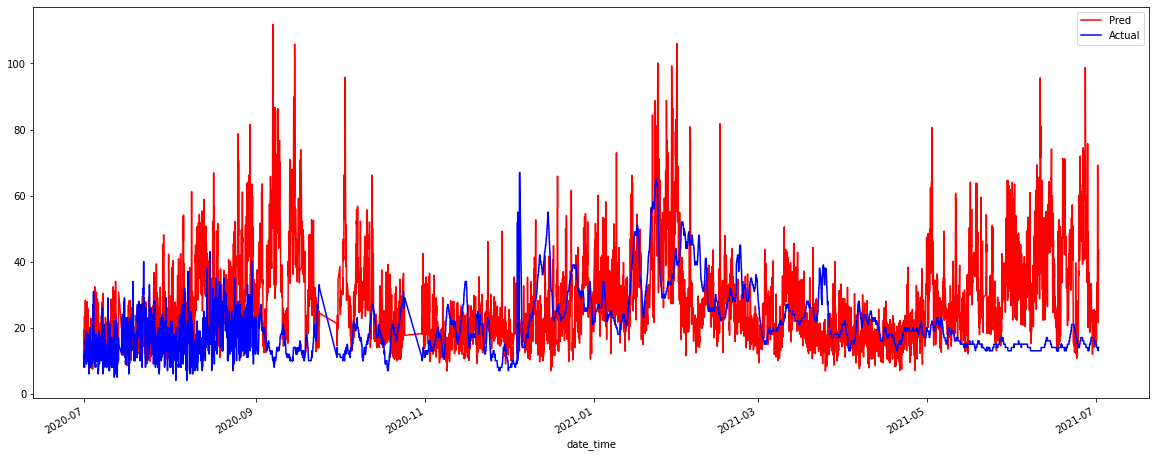

In [82]:
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')


In [83]:
from statsmodels.tools.eval_measures import rmse
error=rmse(predictions['Pred'], predictions['Actual'])
error

17.299520811208772